<a href="https://colab.research.google.com/github/farkhanal/Bengkod/blob/main/Tugas_1Bengkod_A11_2022_14165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 2. LOAD DATA DARI GOOGLE DRIVE
# - Mount Google Drive untuk mengakses file
# - Membaca file CSV tanpa header karena dataset tidak memiliki nama kolom
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Bengkod/adult.csv"
df = pd.read_csv(file_path, header=None)

Mounted at /content/drive


In [ ]:
# Membaca data lagi dengan separator koma (untuk memastikan format benar)
dataset =pd.read_csv('/content/drive/My Drive/Bengkod/adult.csv', sep=',')

In [ ]:
# 3. EKSPLORASI DATA AWAL
# Menampilkan 5 baris pertama data
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
dataset.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
# Menambahkan nama kolom
# Dataset asli tidak memiliki header, jadi kita beri nama kolom
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
df.columns = column_names

In [ ]:
# 3. EKSPLORASI DATA AWAL
# Menampilkan 5 baris pertama data
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Menampilkan 5 baris terakhir data
dataset.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
# Menampilkan informasi dataset (jumlah baris, tipe data, dll)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# 5. PREPROCESSING DATA
# Mengganti nilai ' ?' dengan NA (missing value)
df.replace(' ?', pd.NA, inplace=True)
# Menghapus baris yang memiliki missing value
df.dropna(inplace=True)

In [ ]:
# 6. EXPLORATORY DATA ANALYSIS (EDA)
# 6.1 Distribusi Target (Income)
print("Distribusi Pendapatan:")
print(df['income'].value_counts())

Distribusi Pendapatan:
income
<=50K    22654
>50K      7508
Name: count, dtype: int64


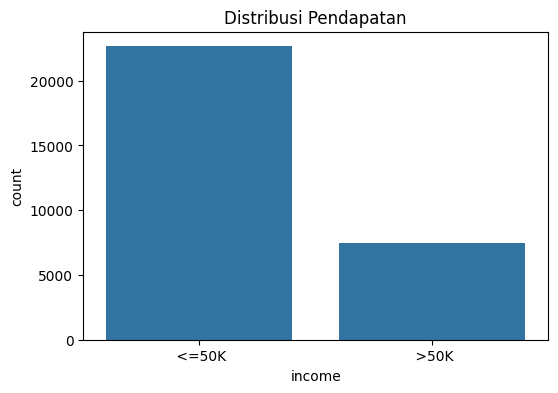

In [ ]:
# Visualisasi distribusi pendapatan
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income')
plt.title('Distribusi Pendapatan')
plt.show()

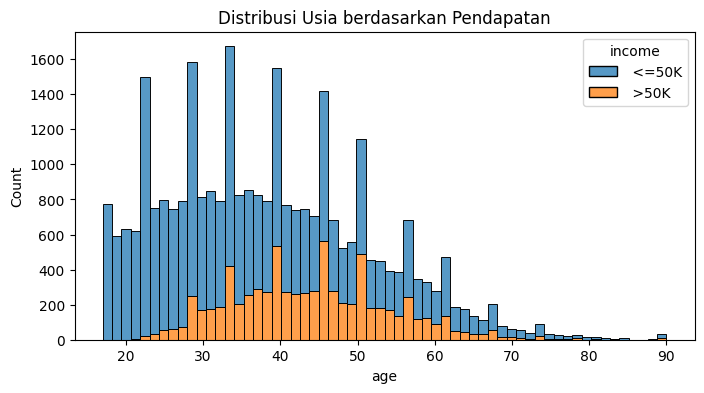

In [ ]:
# 6.2 Hubungan Usia dengan Pendapatan
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='age', hue='income', multiple='stack')
plt.title('Distribusi Usia berdasarkan Pendapatan')
plt.show()

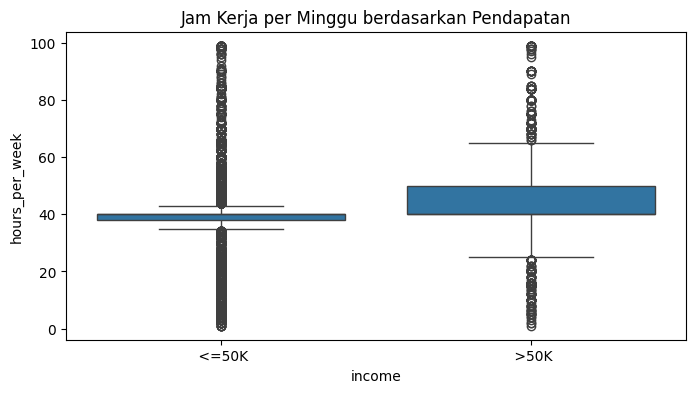

In [ ]:
# 7. PREPARASI DATA UNTUK MODELING
# Membuat dictionary untuk menyimpan LabelEncoder
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='income', y='hours_per_week')
plt.title('Jam Kerja per Minggu berdasarkan Pendapatan')
plt.show()

In [ ]:
# Mengubah semua kolom kategorikal menjadi numerik
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Menyimpan encoder untuk referensi nanti

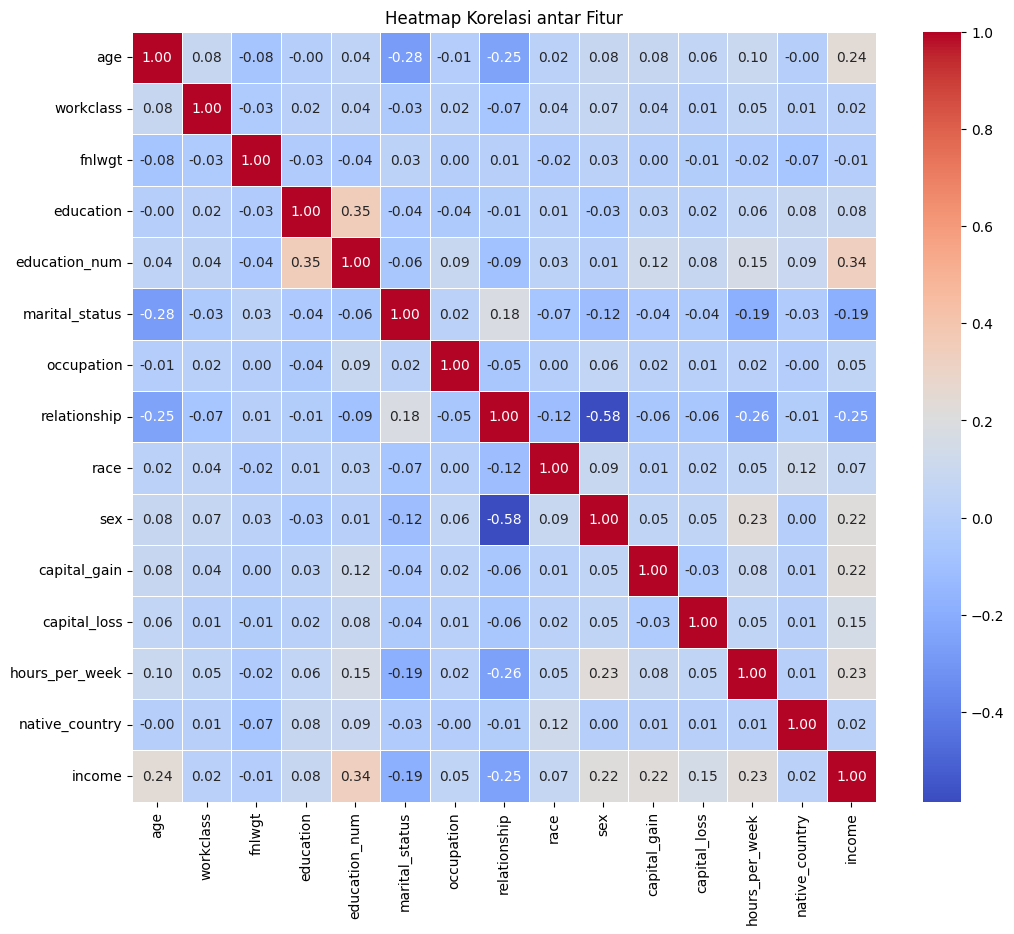

In [ ]:
# . Korelasi
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

In [ ]:
# 8. MEMBAGI DATA
# X = semua kolom kecuali target (income)
# y = kolom target (income)
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
# Membagi data menjadi training (80%) dan testing (20%)
# random_state=42 untuk hasil yang reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 9. MEMBUAT DAN MELATIH MODEL
# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 10. EVALUASI MODEL
# Memprediksi data test
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Menghitung dan menampilkan akurasi
print("Akurasi Model Decision Tree:", accuracy)
# Menampilkan classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model Decision Tree: 0.8088844687551798
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4503
           1       0.62      0.62      0.62      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



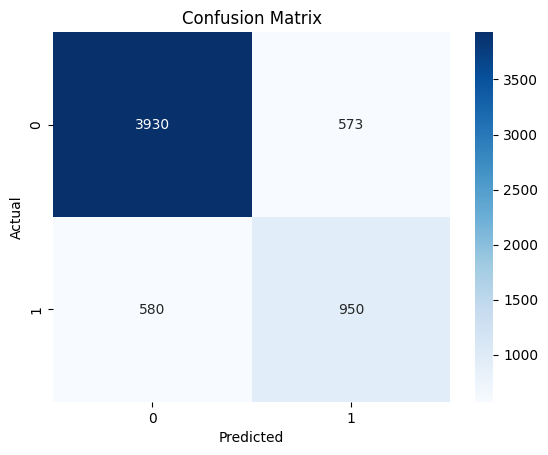

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()